<a href="https://colab.research.google.com/github/Gurjeetsingh11/Machine-Learning/blob/main/MAIN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [4]:
print("G2C model.....")

G2C model.....


In [2]:
prototxt="/content/G2C folder/colorization_deploy_v2.prototxt"

caffe="/content/G2C folder/colorization_release_v2.caffemodel"

pts_npy="/content/G2C folder/pts_in_hull.npy"

In [5]:
net=cv2.dnn.readNetFromCaffe(prototxt,caffe)

In [6]:
pts=np.load(pts_npy)

In [7]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2,313,1,1)

In [8]:
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float32')]

In [24]:
image='/content/G2C folder/tiger.jpg';

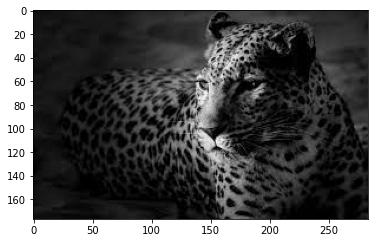

In [25]:
test_image = cv2.imread(image)
plt.imshow(test_image)
plt.show()

In [26]:
normalized = test_image.astype("float32") / 255.0
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)

In [27]:
resized = cv2.resize(lab_image, (224, 224))
L = cv2.split(resized)[0]
L=L-50

In [28]:
# L- channel as an input
net.setInput(cv2.dnn.blobFromImage(L))
#original dimansionality
ab = net.forward()[0, :, :, :].transpose((1,2,0))

In [29]:
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

In [30]:
L = cv2.split(lab_image)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)

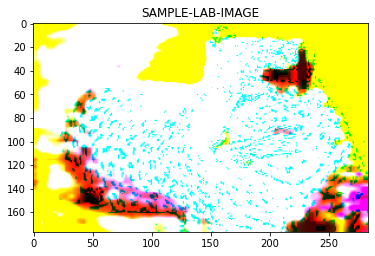

In [31]:
plt.imshow(colorized)
plt.title('SAMPLE-LAB-IMAGE')
plt.show()

In [32]:
RGB_colored = cv2.cvtColor(colorized,cv2.COLOR_LAB2RGB)

In [33]:
RGB_colored = np.clip(RGB_colored, 0, 1)
RGB_colored = (255 * RGB_colored).astype("uint8")

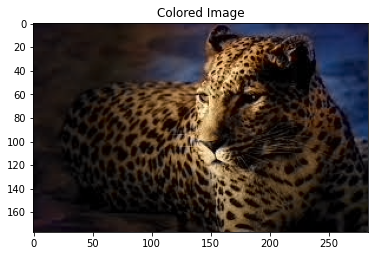

In [34]:
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()